In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [2]:
song_df = pd.read_csv("spotifydata.csv")

In [3]:
song_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
song_df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
null_rows=song_df[song_df.isnull().any(axis=1)]
print(null_rows)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


It turns out that there was only one row with any nulls whatsoever and with a dataset this large the best thing to do would be to drop the single line. 

In [6]:
x = song_df[['liveness', 'tempo', 'time_signature', 'instrumentalness', 'speechiness','acousticness', 
            'duration_ms', 'danceability', 'energy', 'loudness']] 
y = song_df['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 22.067186806325697


In [8]:
coefficients = model.coef_
features = x.columns

In [9]:
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()

In [10]:
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

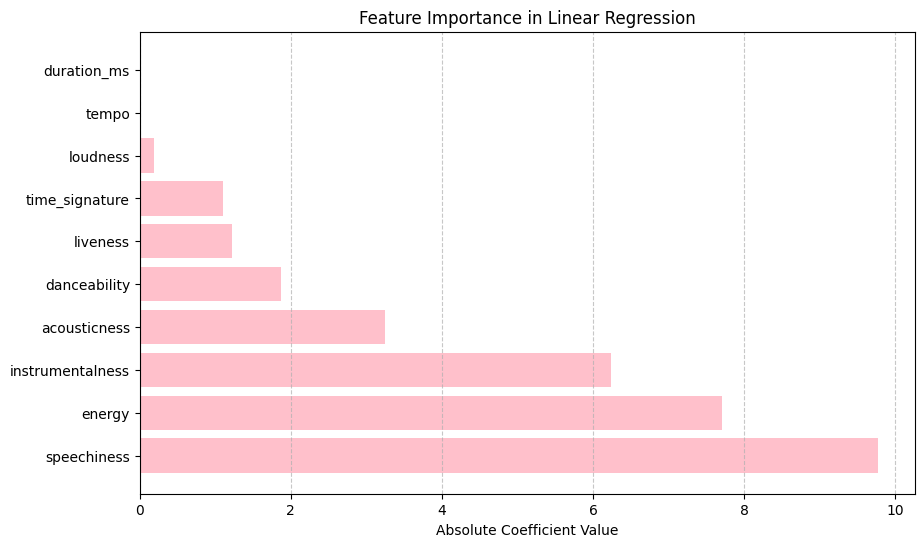

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Coefficient'], color='pink')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [51]:
X = song_df[['liveness', 'tempo', 'time_signature', 'instrumentalness', 'speechiness',
             'acousticness', 'duration_ms', 'danceability', 'energy', 'loudness']]
y = song_df['popularity']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [84]:
y_pred_ridge = ridge_model.predict(X_test)

In [85]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'Ridge RMSE: {rmse_ridge}')

Ridge RMSE: 22.067183066419652


In [86]:
ridge_coefficients = ridge_model.coef_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': ridge_coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

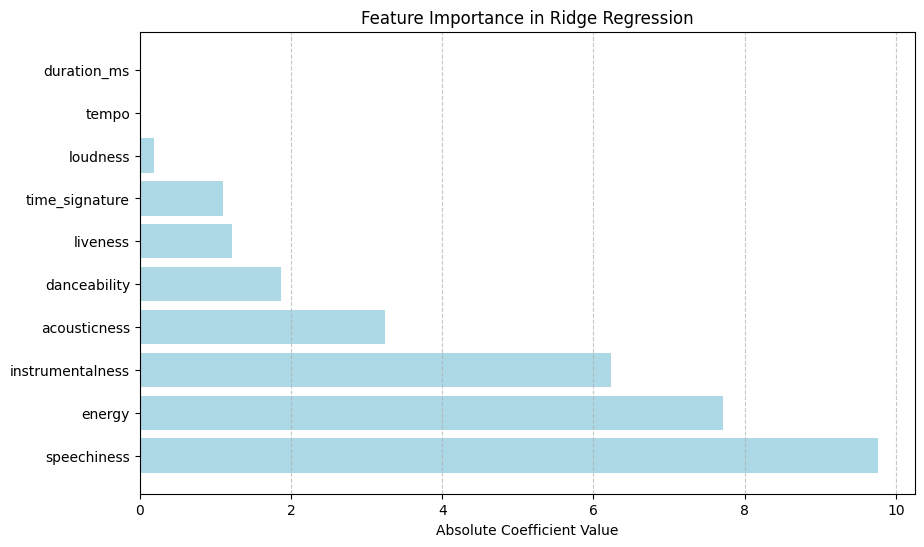

In [87]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Coefficient'], color='lightblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Ridge Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [73]:
X = song_df[['liveness', 'tempo', 'time_signature', 'instrumentalness', 'speechiness',
             'acousticness', 'duration_ms', 'danceability', 'energy', 'loudness']]
y = song_df['popularity']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [79]:
y_pred_rf = rf_model.predict(X_test)

In [80]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 15.112477840980114


In [81]:
rf_importance = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

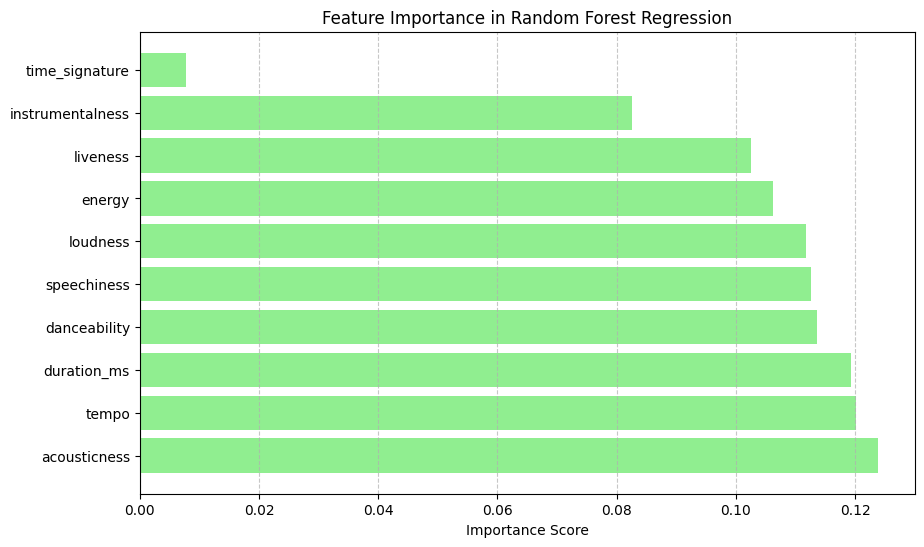

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()